# Análise de Distorção de idade e series

https://dados.rs.gov.br/dataset/fee-taxa-de-distorcao-idade-serie-total-102524

# instalacao da biblioteca folium para gerar mapas
!sudo pip install folium

In [34]:
#importação das bibliotecas
import pandas as pd
%matplotlib inline
import folium 

In [8]:
df = pd.read_csv(r'fee-2013-mun-taxa-de-distorcao-idade-serie-total-102524.csv', encoding='latin1', skiprows=1)

In [16]:
#Renomeia uma coluna
df.rename(columns={'/Educação/Ens...de Série/Total 2013 (-)': 'Taxa Distorcao'}, inplace=True)

In [17]:
df.head()

,Município,ibge,latitude,longitude,Taxa Distorcao
0,Aceguá,4300034,-31.86076,-54.16706,"25,7"
1,Água Santa,4300059,-28.16720,-52.03100,"14,7"
2,Agudo,4300109,-29.64470,-53.25150,"26,4"
3,Ajuricaba,4300208,-28.23420,-53.77570,"24,1"
4,Alecrim,4300307,-27.65790,-54.76490,"18,9"


In [20]:
#Conversao taxa distorcao de texto para float
df['Taxa Distorcao'] = df['Taxa Distorcao'].str.replace(',', '.').astype(float)
df.head()

,Município,ibge,latitude,longitude,Taxa Distorcao
0,Aceguá,4300034,-31.86076,-54.16706,25.7
1,Água Santa,4300059,-28.16720,-52.03100,14.7
2,Agudo,4300109,-29.64470,-53.25150,26.4
3,Ajuricaba,4300208,-28.23420,-53.77570,24.1
4,Alecrim,4300307,-27.65790,-54.76490,18.9


In [21]:
df.dtypes

Município          object
ibge                int64
latitude          float64
longitude         float64
Taxa Distorcao    float64
dtype: object

In [23]:
df.describe()

,ibge,latitude,longitude,Taxa Distorcao
count,4.950000e+02,495.000000,495.000000,495.000000
mean,4.311852e+06,-28.963734,-52.617513,24.586465
std,6.684885e+03,1.127359,1.346589,9.155669
min,4.300034e+06,-33.686600,-57.549700,2.600000
25%,4.306089e+06,-29.611450,-53.516350,18.150000
50%,4.312054e+06,-28.983000,-52.434300,23.700000
75%,4.317350e+06,-27.990700,-51.684200,29.900000
max,4.323804e+06,-27.160800,-49.733300,56.000000


In [25]:
#Os 10 Municipios com a menor taxa de distorção 
df.nsmallest(10, 'Taxa Distorcao')

,Município,ibge,latitude,longitude,Taxa Distorcao
490,Vista Alegre do Prata,4323606,-28.8052,-51.7946,2.6
375,Santo Antônio do Palma,4317558,-28.4956,-52.0267,4.3
28,Áurea,4301552,-27.6936,-52.0505,5.8
268,Nicolau Vergueiro,4312674,-28.5298,-52.4676,7.0
128,Derrubadas,4306320,-27.2642,-53.8645,7.4
119,Cotiporã,4305959,-28.9891,-51.6971,7.5
68,Campestre da Serra,4303673,-28.7926,-51.0941,7.6
476,Vanini,4322558,-28.4758,-51.8447,7.8
236,Linha Nova,4311643,-29.4679,-51.2003,8.0
392,São José do Inhacorá,4318499,-27.7251,-54.1275,8.0


In [27]:
#Os 10 Municipios com a maior taxa de distorção 
df.nlargest(10, 'Taxa Distorcao')

,Município,ibge,latitude,longitude,Taxa Distorcao
307,Pedras Altas,4314175,-31.7217,-53.5838,56.0
316,Pinheiro Machado,4314506,-31.5794,-53.3798,53.9
17,Arambaré,4300851,-30.9093,-51.5046,52.8
140,Eldorado do Sul,4306767,-30.0847,-51.6187,51.9
35,Barra do Quaraí,4301875,-30.2029,-57.5497,51.5
393,São José do Norte,4318507,-32.0151,-52.0331,49.4
413,São Valério do Sul,4319737,-27.7906,-53.9368,49.2
193,Hulha Negra,4309654,-31.4067,-53.8667,49.0
106,Chuí,4305439,-33.6866,-53.4594,48.6
233,Lavras do Sul,4311502,-30.8071,-53.8931,47.7


<AxesSubplot:ylabel='Frequency'>

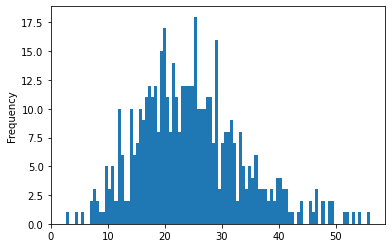

In [29]:
df['Taxa Distorcao'].plot.hist(bins=100)

In [31]:
#Quantidade de municipios com taxa de distorcao menor igual a 10
df[df['Taxa Distorcao'] <= 10].count()

Município         17
ibge              17
latitude          17
longitude         17
Taxa Distorcao    17
dtype: int64

In [32]:
#Quantidade de municipios com taxa de distorcao maior igual a 45
df[df['Taxa Distorcao'] >= 45].count()

Município         17
ibge              17
latitude          17
longitude         17
Taxa Distorcao    17
dtype: int64

## Funcionamento do Folium

In [41]:
brasil = folium.Map(location = [-25.4413569,-49.2740054], width=750, height=50)
brasil = folium.Map(location = [-25.4413569,-49.2740054], title='Taxa de distoção')
brasil = folium.Map(location = [-25.4413569,-49.2740054], zoom_start = 4)
brasil

In [56]:
rs = folium.Map(location=[-31,-54], zoom_start=6,  width=750, height=450)
rs

In [60]:
#Criando um marcador para os melhores municipios onde a taxa de distorcao é menor igual a 10
for _, registro in df[df['Taxa Distorcao'] <= 10].iterrows():
    folium.Marker(
        location = [registro['latitude'], registro['longitude']],
        popup = registro['Município'],
        icon = folium.map.Icon(color='green')
    ).add_to(rs)
    
rs

In [61]:
#Criando um marcador para os melhores municipios onde a taxa de distorcao é maior igual a 45
for _, registro in df[df['Taxa Distorcao'] >= 45].iterrows():
    folium.Marker(
        location = [registro['latitude'], registro['longitude']],
        popup = registro['Município'],
        icon = folium.map.Icon(color='red')
    ).add_to(rs)
    
rs

In [63]:
#Taxa de distorção de Porto Alegre
df[df['Município'] == 'Porto Alegre']['Taxa Distorcao']

325    32.3
Name: Taxa Distorcao, dtype: float64